# PAGERANK

In [1]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx 
import matplotlib.pyplot as plt

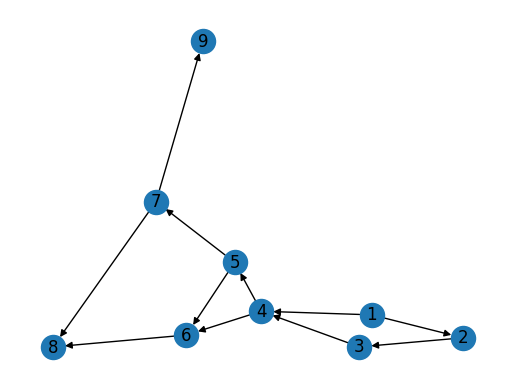

In [18]:
# Membuat objek graf berarah
G = nx.DiGraph()

#menambahkan node
nodes =[1,2,3,4,5,6,7,8,9]
G.add_nodes_from(nodes)

# Menambahkan edge
edges = ([(1,2),(1,4),(2,3),(3,4),(4,5),(4,6),(5,6),(5,7),(6,8),(7,8),(7,9)])
G.add_edges_from(edges)

# Menggambar graf
pos = nx.spring_layout(G)

#menggambar nodes 
nx.draw_networkx_nodes(G, pos)

#memberi label angka 
nx.draw_networkx_labels(G, pos)

#memberi sisi pada nodes 
nx.draw_networkx_edges(G, pos, arrows=True)

#menampilkan graf
plt.axis('off')
plt.show()

In [4]:
# menghitung nilai pagerank 
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
pagerank(G)

{1: 0.09342815022016224,
 2: 0.09607974398610364,
 4: 0.16906743626483806,
 3: 0.09342815022016224,
 5: 0.12894448277665255,
 6: 0.12865979085788348,
 7: 0.1408112619842251,
 8: 0.09301736399896937,
 9: 0.05656361969100318}

## Perhitungan Manual Pagerank 


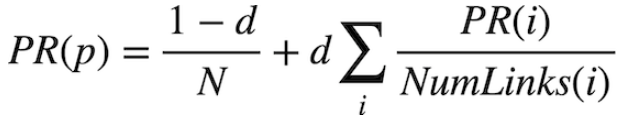 

Keterangan : 

d = 0,85 

N = banyak node 

PR = node yang terhubung dengan node yang dituju 

NumLinks = banyak node yang keluar dari PR


In [19]:
# menghitung PageRank secara manual
d = 0.85 # faktor dampak
N = len(G.nodes()) # jumlah node
pr = {node: 1/N for node in G.nodes()} # nilai awal PageRank

for i in range(100): # melakukan iterasi hingga konvergen
    new_pr = {}
    for node in G.nodes():
        in_nodes = [n for n in G.predecessors(node)] # node yang mengarah ke node ini
        in_pr = sum([pr[n]/len(list(G.successors(n))) for n in in_nodes]) if in_nodes else 0 # PageRank dari node yang mengarah ke node ini
        new_pr[node] = (1-d)/N + d*in_pr # menghitung nilai PageRank baru untuk node ini
    pr = new_pr.copy()

print("Hitung Manual", pr)

Hitung Manual {1: 0.01666666666666667, 2: 0.023750000000000004, 3: 0.036854166666666674, 4: 0.05507604166666667, 5: 0.04007398437500001, 6: 0.057105427734375006, 7: 0.03369811002604167, 8: 0.07952797700195313, 9: 0.03098836342773438}


## Menghitung Pagerank Dengan Networkx

In [5]:
# mencari nilai betweenness centrality
nx.betweenness_centrality(G)

{1: 0.10714285714285714,
 2: 0.017857142857142856,
 4: 0.5535714285714285,
 3: 0.10714285714285714,
 5: 0.3214285714285714,
 6: 0.1607142857142857,
 7: 0.26785714285714285,
 8: 0.03571428571428571,
 9: 0.0}

# IMPLEMENTASI ULANG DARI GITHUB 
[Shakunni/Extractive-Text-Summarization](https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
)


## Import Library

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#install library yang digunakan dalam meringkas dokumen
!pip install PyPDF2  
!pip install docx2txt 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

## Menentukan Tipe Dokumen

Menentukan tipe dokumen yang akan dibaca, apakah dalam format .txt atau .pdf, atau tidak valid.

Jika tipe dokumen yang dibaca adalah dalam format .txt, maka fungsi akan membuka file dan membaca isi dari file tersebut menggunakan fungsi open() dan read(). 
Jika tipe dokumen yang dibaca adalah dalam format .pdf, maka fungsi akan membuka file, membaca halaman pertama dari file tersebut menggunakan PyPDF2, dan mengekstrak teks dari halaman tersebut.

Jika tipe dokumen yang dibaca tidak valid, fungsi akan mencetak pesan kesalahan dan mengembalikan string kosong.

Setelah fungsi berhasil membaca isi dokumen, maka isi dokumen tersebut akan dijadikan sebagai output dari fungsi readDoc(name).


In [9]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document


## Tokenisasi File 

Membuat sebuah objek doc_tokenizer dari kelas PunktSentenceTokenizer. Kelas ini merupakan bagian dari library nltk dan digunakan untuk memecah teks menjadi kalimat-kalimat.

Memecah teks dokumen menjadi kalimat-kalimat menggunakan method tokenize() dari objek doc_tokenizer. Method ini akan mengembalikan sebuah list yang berisi semua kalimat dalam dokumen.

Setelah fungsi berhasil memecah dokumen menjadi kalimat-kalimat, maka list kalimat tersebut akan dijadikan sebagai output dari fungsi tokenize(document).


In [10]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

## Read Dokumen

In [11]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: story1.txt
You have asked for the document story1.txt
1


FileNotFoundError: ignored

## Membuat List Kalimat Dari Dokumen

In [ ]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

In [ ]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

In [ ]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

In [ ]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

## Perhitungan Untuk Menghasilkan Term-document Matrix (TD Matrix) Pada Dokumen

In [ ]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))

In [ ]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

In [ ]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

## Menampilkan Hasil Graph

In [ ]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

## Membuat Peringkat Setiap Kalimat Dengan Menggunakan Textrank

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

## Finding Important Sentances and Genrating Summary

In [ ]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

In [ ]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

In [ ]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

## Menggabungkan Kalimat Penting Ke Dalam File Baru

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

In [ ]:
for lines in sentence_list:
    print(lines)